In [266]:
import numpy as np
import pandas as pd
import tensorflow
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [267]:
df = pd.read_csv('cancer.csv')


In [268]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# * Data Preprocessing

# 1-Drop the null column



In [269]:
df.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [270]:
df.dropna(axis=1, inplace=True)

# 2-Encoding categorical data

In [271]:
df['diagnosis'] = np.where(df['diagnosis']=='M', 1, 0)


### Importing the dataset

In [272]:
X = df.iloc[:,2:]
Y = df.iloc[:, 1:2]
print(X)
print(Y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

### Splitting the dataset into the Training set and Test set

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


# cross validation

In [274]:
#import StratiFiedFold package
from sklearn.model_selection import KFold


In [275]:
str_kf=KFold(n_splits=3,shuffle = True,random_state=42)

In [276]:
for train, test in str_kf.split(X_train,y_train):
   # print('train: %s, teat: %s' % (df.iloc[train],df.iloc[test]))
    cv_x,cv_y=df.iloc[train],df.iloc[test]
    cv_train = cv_x.iloc[:,2:]
    cv_test = cv_y.iloc[:, 1:2]
    print(cv_train)
    print(cv_test)
    
    

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
4         20.290         14.34          135.10     1297.0          0.10030   
6         18.250         19.98          119.60     1040.0          0.09463   
8         13.000         21.82           87.50      519.8          0.12730   
..           ...           ...             ...        ...              ...   
419       11.160         21.41           70.95      380.3          0.10180   
420       11.570         19.04           74.20      409.7          0.08546   
423       13.660         19.13           89.46      575.3          0.09057   
424        9.742         19.12           61.93      289.7          0.10750   
425       10.030         21.28           63.19      307.3          0.08117   

     compactness_mean  concavity_mean  concave points_mean  sym

##  applying the Artificial Neural Networks (ANN)

In [277]:
Classification_Model = Sequential()

Classification_Model.add(Dense(units= 16, activation = 'relu', input_dim=30)) 
# units indicates here the ooutput dimention of Dense layer
Classification_Model.add(Dense(units=8, activation='relu'))
Classification_Model.add(Dense(units=6, activation='relu'))
Classification_Model.add(Dense(units=1, activation='sigmoid'))

### Compiling the ANN

In [278]:
Classification_Model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


### Training the ANN on the Training set

In [279]:
history=Classification_Model.fit(X_train, y_train, batch_size=10, epochs=100)


Epoch 1/100
43/43 [==============================] - 1s 1ms/step - loss: 2.7995 - accuracy: 0.7958
Epoch 2/100
43/43 [==============================] - 0s 999us/step - loss: 0.4044 - accuracy: 0.8568
Epoch 3/100
43/43 [==============================] - 0s 976us/step - loss: 0.4158 - accuracy: 0.8685
Epoch 4/100
43/43 [==============================] - 0s 976us/step - loss: 0.4056 - accuracy: 0.8474
Epoch 5/100
43/43 [==============================] - 0s 984us/step - loss: 0.3418 - accuracy: 0.8709
Epoch 6/100
43/43 [==============================] - 0s 992us/step - loss: 0.4148 - accuracy: 0.8286
Epoch 7/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8357
Epoch 8/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8662
Epoch 9/100
43/43 [==============================] - 0s 999us/step - loss: 0.3620 - accuracy: 0.8075
Epoch 10/100
43/43 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.84

43/43 [==============================] - 0s 953us/step - loss: 0.2115 - accuracy: 0.9155
Epoch 82/100
43/43 [==============================] - 0s 976us/step - loss: 0.2200 - accuracy: 0.9061
Epoch 83/100
43/43 [==============================] - 0s 976us/step - loss: 0.2361 - accuracy: 0.9178
Epoch 84/100
43/43 [==============================] - 0s 1ms/step - loss: 0.2202 - accuracy: 0.9085
Epoch 85/100
43/43 [==============================] - 0s 951us/step - loss: 0.1951 - accuracy: 0.9178
Epoch 86/100
43/43 [==============================] - 0s 965us/step - loss: 0.2118 - accuracy: 0.9178
Epoch 87/100
43/43 [==============================] - 0s 953us/step - loss: 0.2327 - accuracy: 0.9178
Epoch 88/100
43/43 [==============================] - 0s 976us/step - loss: 0.2350 - accuracy: 0.8967
Epoch 89/100
43/43 [==============================] - 0s 930us/step - loss: 0.2219 - accuracy: 0.9061
Epoch 90/100
43/43 [==============================] - 0s 930us/step - loss: 0.2332 - accuracy: 0.

In [280]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

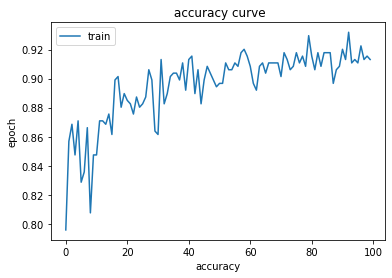

In [281]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title(' accuracy curve')


plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

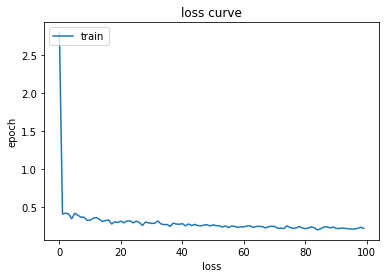

In [282]:
plt.plot(history.history['loss'])
plt.title('loss curve')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

### Predicting the Test set results

In [283]:
y_pred = Classification_Model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix and accurancy


In [284]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
print( confusion_matrix(y_test, y_pred))
print( classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)



[[89  0]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        89
           1       1.00      0.87      0.93        54

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



0.951048951048951

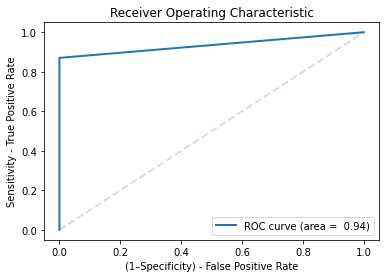

In [285]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt

lw = 2
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.15)
plt.plot(fpr, tpr, lw=lw, label=f'ROC curve (area = {roc_auc: 0.2f})')

plt.xlabel('(1–Specificity) - False Positive Rate')
plt.ylabel('Sensitivity - True Positive Rate')
plt.title(f'Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
